## Project Overview 

This project explores various machine learning algorithms for a binary classification task using the Heart Failure Prediction dataset from Kaggle. The dataset contains 918 observations with 12 attributes, where the target variable (y) is "HeartDisease":
* 0: No heart failure
* 1: Heart failure

Link to the dataset in [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Objective
The goal is to compare the performance of different machine learning models in predicting heart failure.


### Machine Learning Models Considered
The following classification algorithms will be implemented and evaluated:
* Logistic Regression Classifier
* Support Vector Machine (SVM) Classifier
* Random Forest Classifier
* Gradient Boosting Classifier
* Multi-Layer Perceptron (MLP) Classifier


In [1]:
# Libraries for the Project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

# Setting the style of the plots
sns.set_theme(style="darkgrid", palette="pastel")

### Heart Failure Prediction Dataset overview 

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


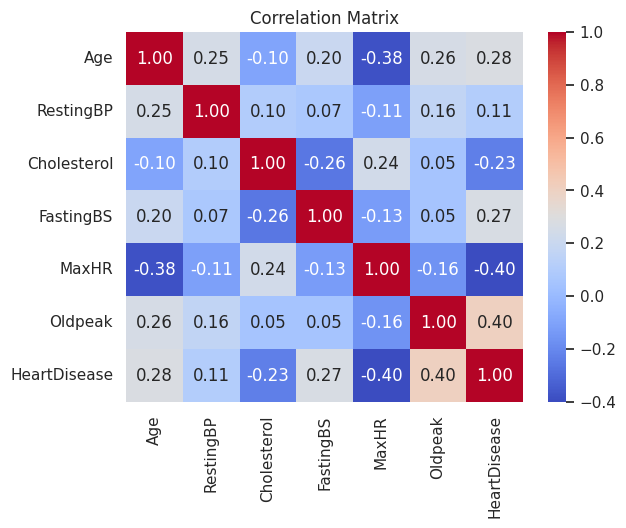

In [4]:
corr_matrix_numeric_values = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr_matrix_numeric_values, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that the dataset attributes do not exhibit a high correlation with one another.

### Data Preprocessing

The dataset includes categorical variables that need to be one-hot encoded. To accomplish this, we will use the `get_dummies()` function from pandas to encode the categorical attributes.


In [5]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int, drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [6]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler()

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(734, 15) (184, 15)


### Logistic Regression Model

Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.8623986580933745
Accuracy: 0.8532608695652174
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



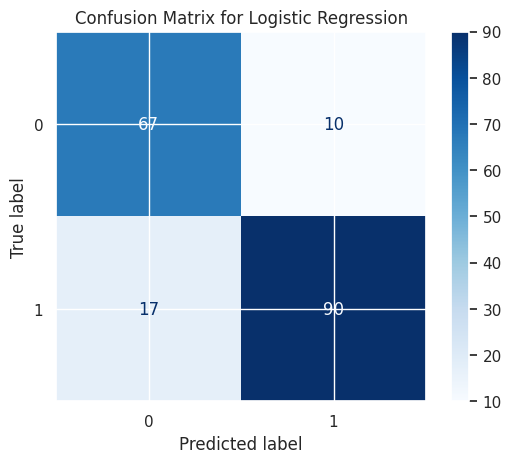

In [7]:
# Logistic Regression
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

log_reg = LogisticRegression(solver='liblinear')
log_reg_cv = GridSearchCV(log_reg, parameters, cv=5, n_jobs=-1)
log_reg_cv.fit(X_train, y_train)
predictions = log_reg_cv.predict(X_test)
acc_log_reg = accuracy_score(y_test, predictions)

print(f'Best parameters: {log_reg_cv.best_params_}')
print(f'Best score: {log_reg_cv.best_score_}')
print(f'Accuracy: {acc_log_reg}')
print(f'Classification report: \n{classification_report(y_test, predictions)}')

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Support Vector Machine (SVM) Model 

Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.8705432858074736
Accuracy: 0.8586956521739131
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



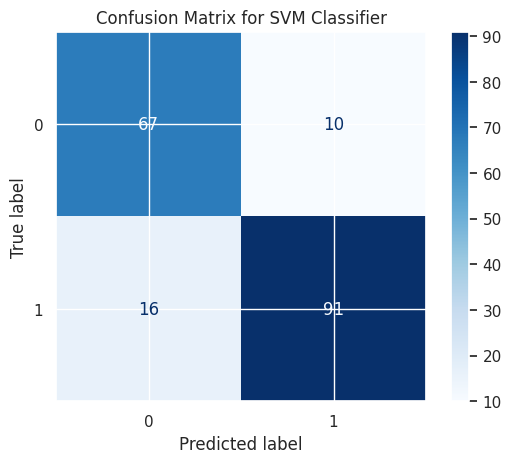

In [8]:
# SVM Classifier
parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svc = SVC()
svc_cv = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
svc_cv.fit(X_train, y_train)
predictions = svc_cv.predict(X_test)
acc_svc = accuracy_score(y_test, predictions)

print(f'Best parameters: {svc_cv.best_params_}')
print(f'Best score: {svc_cv.best_score_}')
print(f'Accuracy: {acc_svc}')
print(f'Classification report: \n{classification_report(y_test, predictions)}')

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

### Data Preprocessing Again

But now `drop_first = False`

In [9]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [10]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler()

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(734, 20) (184, 20)


### Random Forest Model 

Best parameters: {'max_depth': 9, 'n_estimators': 100}
Best score: 0.8773553256919205
Accuracy: 0.8858695652173914
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



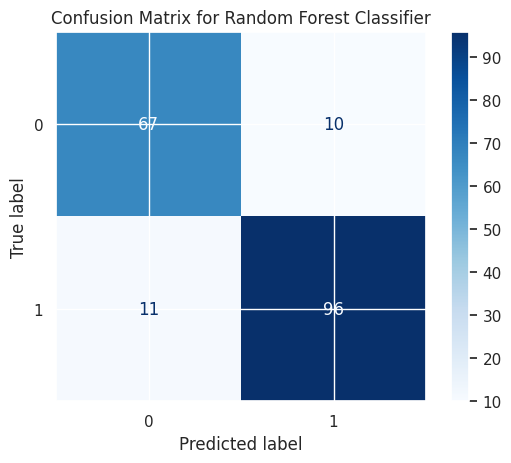

In [11]:
parameters = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [3, 5, 7, 9, 11],
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)
predictions = rf_cv.predict(X_test)
acc_rf = accuracy_score(y_test, predictions)

print(f'Best parameters: {rf_cv.best_params_}')
print(f'Best score: {rf_cv.best_score_}')
print(f'Accuracy: {acc_rf}')
print(f'Classification report: \n{classification_report(y_test, predictions)}')

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Gradient Boosting Model

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best score: 0.8637498835150499
Accuracy: 0.875
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



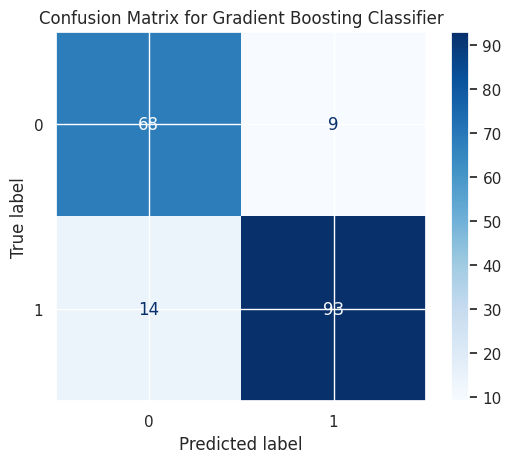

In [12]:
parameters = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [3, 5, 7, 9, 11],
}

gradiant_boosting = GradientBoostingClassifier()
gradiant_boosting_cv = GridSearchCV(gradiant_boosting, parameters, cv=5, n_jobs=-1)
gradiant_boosting_cv.fit(X_train, y_train)
predictions = gradiant_boosting_cv.predict(X_test)
acc_gradiant_boosting = accuracy_score(y_test, predictions)

print(f'Best parameters: {gradiant_boosting_cv.best_params_}')
print(f'Best score: {gradiant_boosting_cv.best_score_}')
print(f'Accuracy: {acc_gradiant_boosting}')
print(f'Classification report: \n{classification_report(y_test, predictions)}')

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

#### Multi-Layer Perceptron (MLP) Model

Best parameters: {'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.005, 'max_iter': 500, 'solver': 'adam'}
Best score: 0.8637312459230266
Accuracy: 0.8695652173913043
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



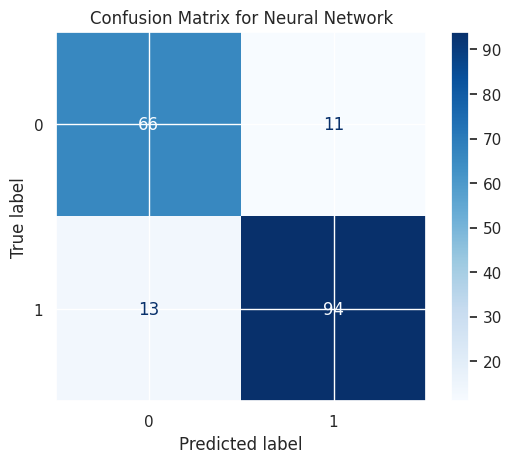

In [13]:
parameters = {
    'hidden_layer_sizes': [(20, 10), (30, 15), (40, 20), (50, 25), (64, 32)],
    'activation': ['relu'], 
    'solver': ['adam'],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'early_stopping': [True],
}

mlp = MLPClassifier(random_state=42)
mlp_cv = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)
mlp_cv.fit(X_train, y_train)
predictions = mlp_cv.predict(X_test)
acc_mlp = accuracy_score(y_test, predictions)

print(f'Best parameters: {mlp_cv.best_params_}')
print(f'Best score: {mlp_cv.best_score_}')
print(f'Accuracy: {acc_mlp}')
print(f'Classification report: \n{classification_report(y_test, predictions)}')

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Neural Network')
plt.show()

### Results

In [14]:
print('Accuracy for Logistic Regression:', acc_log_reg)
print('Accuracy for SVM Classifier:', acc_svc)
print('Accuracy for Random Forest Classifier:', acc_rf)
print('Accuracy for Gradient Boosting Classifier:', acc_gradiant_boosting)
print('Accuracy for MLP Classifier:', acc_mlp)

Accuracy for Logistic Regression: 0.8532608695652174
Accuracy for SVM Classifier: 0.8586956521739131
Accuracy for Random Forest Classifier: 0.8858695652173914
Accuracy for Gradient Boosting Classifier: 0.875
Accuracy for MLP Classifier: 0.8695652173913043
